# Name -Sneha Lokare

# HR Analytics

# Import all important libraries

In [2]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import statsmodels.api as sm
import xgboost as xgb
import lightgbm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# Read Dataset

In [3]:
df_train=pd.read_csv("D:\\Analytics Vidhya\\train_LZdllcl.csv")
df_train.head(4)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0


# Exploratory Data Analysis

In [4]:
df_train.shape

(54808, 14)

In [5]:
df_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
df_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# Checking null values

In [8]:
df_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
all_data_na = (df_train.isnull().sum() / len(df_train)) * 100
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
employee_id,0.000000
department,0.000000
region,0.000000
education,4.395344
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
previous_year_rating,7.524449
length_of_service,0.000000


In [10]:
df_train["previous_year_rating"].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [11]:
df_train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

# Filling Null Values

In [12]:
df_train['education'].fillna(df_train['education'].mode()[0],inplace = True)
df_train["previous_year_rating"].fillna(df_train["previous_year_rating"].mode()[0],inplace = True)

In [13]:
df_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Checking Correlation

In [14]:
df_train.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


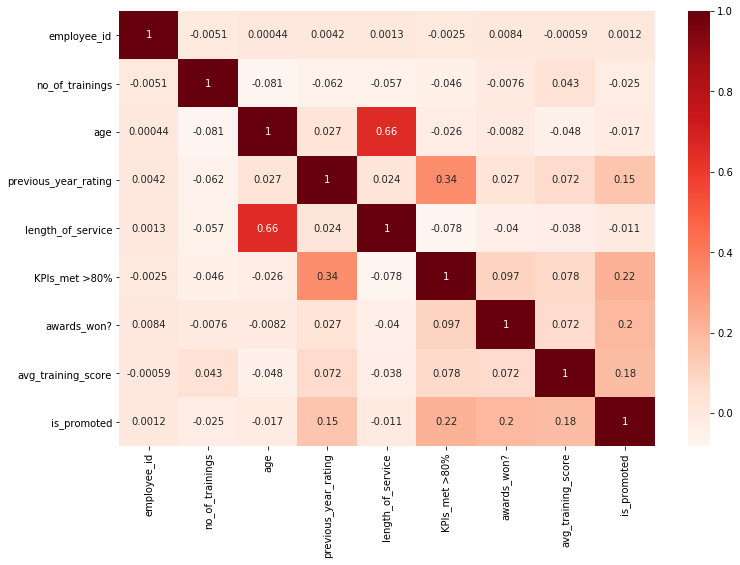

In [15]:
plt.figure(figsize=(12,8))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
df_train.groupby("gender")['is_promoted'].value_counts()

gender  is_promoted
f       0              14845
        1               1467
m       0              35295
        1               3201
Name: is_promoted, dtype: int64

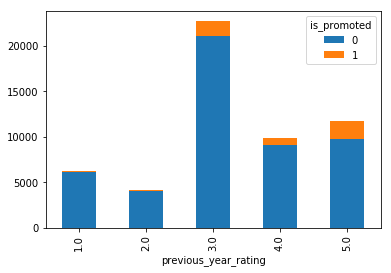

In [17]:
df_train.groupby("previous_year_rating")['is_promoted'].value_counts().unstack().plot(kind='bar',stacked=True)

In above plot it shows previous_year_rating rating 3 is higher.Rating 3 and more has higher chance of getting promoted.

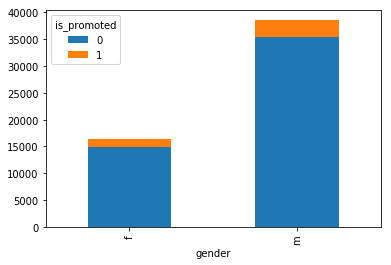

In [18]:
df_train.groupby("gender")['is_promoted'].value_counts().unstack().plot(kind='bar',stacked=True)

In [19]:
df_train.groupby("gender")['is_promoted'].value_counts()

gender  is_promoted
f       0              14845
        1               1467
m       0              35295
        1               3201
Name: is_promoted, dtype: int64

In [20]:
df_train["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Imbalance classification problem

In [21]:
df_train.groupby('previous_year_rating')['is_promoted'].value_counts()

previous_year_rating  is_promoted
1.0                   0               6135
                      1                 88
2.0                   0               4044
                      1                181
3.0                   0              21048
                      1               1694
4.0                   0               9093
                      1                784
5.0                   0               9820
                      1               1921
Name: is_promoted, dtype: int64

# Department & is_promoted bar chart

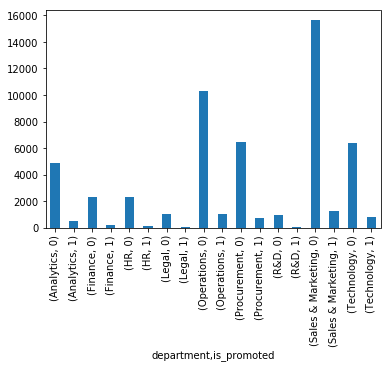

In [22]:
df_train.groupby("department")['is_promoted'].value_counts().plot(kind='bar',
                                                                  stacked=True)                                                                                                                                                                                                                                                                                                              

In [23]:
# EDA
for col in df_train.drop('is_promoted', axis=1).columns:
    if (df_train[col].dtype == 'object'):
        xx = df_train.groupby(col)['is_promoted'].value_counts().unstack()
        per_not_promoted = xx.iloc[:, 0] *100/xx.apply(lambda x: x.sum(), axis=1)
        per_promoted = xx.iloc[:, 1]*100/xx.apply(lambda x: x.sum(), axis=1)
        xx['%_0'] = round(per_not_promoted,2)
        xx['%_1'] = round(per_promoted,2)
        print(xx)

is_promoted            0     1    %_0    %_1
department                                  
Analytics           4840   512  90.43   9.57
Finance             2330   206  91.88   8.12
HR                  2282   136  94.38   5.62
Legal                986    53  94.90   5.10
Operations         10325  1023  90.99   9.01
Procurement         6450   688  90.36   9.64
R&D                  930    69  93.09   6.91
Sales & Marketing  15627  1213  92.80   7.20
Technology          6370   768  89.24  10.76
is_promoted      0    1    %_0    %_1
region                               
region_1       552   58  90.49   9.51
region_10      597   51  92.13   7.87
region_11     1241   74  94.37   5.63
region_12      467   33  93.40   6.60
region_13     2418  230  91.31   8.69
region_14      765   62  92.50   7.50
region_15     2586  222  92.09   7.91
region_16     1363  102  93.04   6.96
region_17      687  109  86.31  13.69
region_18       30    1  96.77   3.23
region_19      821   53  93.94   6.06
region_2   

Promotions are worst in Legal department (5.1%). Best promotions are in technology department (10.7%).
Female employee is highly promoted as compare to male employee.

In [24]:
# Convert categorical to dummies
def convert_categorical_to_dummies(df):
    list_to_drop = []
    for col in df.columns:
        if df[col].dtype == 'object':
            print("Converting....", col)
            list_to_drop.append(col)
            df = pd.concat([df, pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    return df, list_to_drop

In [25]:
# Convert data to dummy variables
processed_data, list_to_drop = convert_categorical_to_dummies(df_train)
print("Total shape of Data :", processed_data.shape)
print("Columns which need to be dropped :", list_to_drop)
processed_data = processed_data.drop(list_to_drop, axis = 1)
print("Total shape of Data :", processed_data.shape)

train_xs = processed_data.drop(['employee_id',"is_promoted"],axis=1)
labels = df_train["is_promoted"]

Converting.... department
Converting.... region
Converting.... education
Converting.... gender
Converting.... recruitment_channel
Total shape of Data : (54808, 60)
Columns which need to be dropped : ['department', 'region', 'education', 'gender', 'recruitment_channel']
Total shape of Data : (54808, 55)


# Splitting Dataset

x=train_xs & y=labels

In [73]:
seed=10
test_size=0.4
x_train,x_test,y_train,y_test= train_test_split(train_xs,labels,test_size=test_size,random_state=seed)

# Model Building

# LogisticRegression

In [28]:
lr =LogisticRegression()
model = lr.fit(x_train,y_train)
pred = model.predict(x_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(model.score(x_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(model.score(x_test, y_test)))

Accuracy of Logistic Regression classifier on training set: 0.92
Accuracy of Logistic Regression classifier on test set: 0.92


In [30]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19945   152]
 [ 1570   257]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     20097
           1       0.63      0.14      0.23      1827

    accuracy                           0.92     21924
   macro avg       0.78      0.57      0.59     21924
weighted avg       0.90      0.92      0.90     21924



In above classification report got low recall & f1-score for class 1(is_promoted).

# XGBClassifier

In [32]:
#  Create parameters to search
params = {
     'learning_rate': [0.01],#learning rate
     'n_estimators': [900, 1000, 1100],# no. of trees
     'max_depth':[7,8,9],
     'reg_alpha':[0.3, 0.4, 0.5] # regularization alpha(lasso)
    }
 
# Initializing the XGBoost Classifier
xgb_model = XGBClassifier()
 
# Gridsearch initialization
gsearch = RandomizedSearchCV(xgb_model, params,
                    verbose=True,
                    cv=3,
                    n_jobs=-1)
 
gsearch.fit(train_xs, labels)
 
#Printing the best chosen params
print("Best Parameters :",gsearch.best_params_)
 
params = {'objective':'binary:logistic', 'booster':'gbtree'}
 
# Updating the parameter as per grid search
params.update(gsearch.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 42.5min finished


Best Parameters : {'reg_alpha': 0.3, 'n_estimators': 1100, 'max_depth': 7, 'learning_rate': 0.01}


In [33]:
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
model1 = XGBClassifier(**params)
model1.fit(x_train, y_train)
# make predictions for test data
y_pred = model1.predict(x_test)
# predictions = [round(value) for value in y_pred]

In [34]:
print('Accuracy of XGBoost classifier on training set: {:.2f}'
     .format(model1.score(x_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(model1.score(x_test, y_test)))

Accuracy of XGBoost classifier on training set: 0.94
Accuracy of XGBoost classifier on test set: 0.94


In [35]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
thresholds = np.append(thresholds, 1)

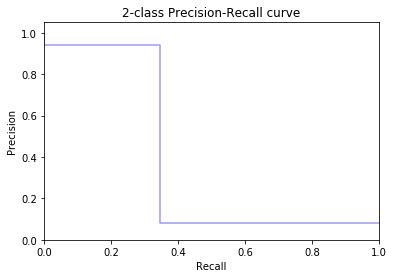

In [36]:
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

In [37]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
print(f1_scores)

[0.15384615 0.50739113 0.        ]


In [39]:
print(recall)

[1.         0.34756431 0.        ]


Threshold cutoff:  1
Max F1-score at cut-off :  0.5073911306432282


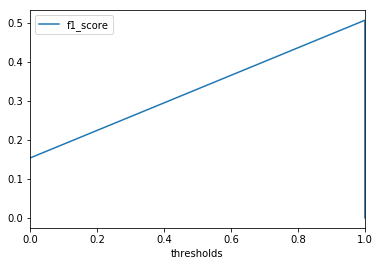

In [40]:
scrs = pd.DataFrame({'precision' : precision, 'recall' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')

In [44]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.38


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.38')

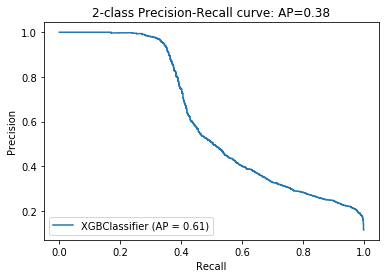

In [45]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model1, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.38%


In [47]:
print('Accuracy of XGBoost classifier on training set: {:.2f}'
     .format(model1.score(x_train, y_train)))
print('Accuracy of XGBoost classifier on test set: {:.2f}'
     .format(model1.score(x_test, y_test)))

Accuracy of XGBoost classifier on training set: 0.94
Accuracy of XGBoost classifier on test set: 0.94


In [48]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20056    41]
 [ 1192   635]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     20097
           1       0.94      0.35      0.51      1827

    accuracy                           0.94     21924
   macro avg       0.94      0.67      0.74     21924
weighted avg       0.94      0.94      0.93     21924



In [87]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,y_pred)
print("AUC: %.3f" %auc)

AUC: 0.673


# LGBMClassifier

In [74]:
# lightgbm.LGBMClassifier()
lgbm_model = lightgbm.LGBMClassifier(objective='binary')
lgbm_model.fit(x_train, y_train)
# make predictions for test data
y_pred1 = lgbm_model.predict(x_test)
predictions1 = [round(value) for value in y_pred1]

In [75]:
accuracy = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.40%


In [76]:
print('Accuracy of LGBMClassifier on training set: {:.2f}'
     .format(lgbm_model.score(x_train, y_train)))
print('Accuracy of LGBMClassifier on test set: {:.2f}'
     .format(lgbm_model.score(x_test, y_test)))

Accuracy of LGBMClassifier on training set: 0.94
Accuracy of LGBMClassifier on test set: 0.94


In [77]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[20058    39]
 [ 1188   639]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     20097
           1       0.94      0.35      0.51      1827

    accuracy                           0.94     21924
   macro avg       0.94      0.67      0.74     21924
weighted avg       0.94      0.94      0.93     21924



In [86]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_test,y_pred1)
print("AUC: %.3f" %auc)

AUC: 0.674


XGBClassifier & LGBMClassifier gives same accuracy on train dataset.

# Working on test dataset

In [53]:
df_test=pd.read_csv("D:\\Analytics Vidhya\\test_2umaH9m.csv")
df_test.head(4)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65


In [55]:
df_test.shape

(23490, 13)

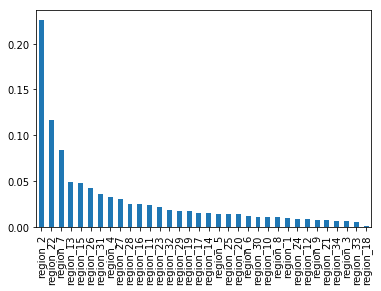

In [56]:
df_test['region'].value_counts(normalize=True).plot(kind='bar')

In [58]:
df_test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [59]:
df_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [60]:
df_test['education'].fillna(df_test['education'].mode()[0],inplace = True)
df_test["previous_year_rating"].fillna(df_test["previous_year_rating"].mode()[0],inplace = True)

In [61]:
# Convert data to dummy variables
processed_data, list_to_drop = convert_categorical_to_dummies(df_test)
print("Total shape of Data :", processed_data.shape)
print("Columns which need to be dropped :", list_to_drop)
processed_data = processed_data.drop(list_to_drop, axis = 1)
print("Total shape of Data :", processed_data.shape)

# Removing the id attributes
test_data = processed_data.drop(['employee_id'],axis=1)
y_pred2 = model1.predict_proba(test_data)

Converting.... department
Converting.... region
Converting.... education
Converting.... gender
Converting.... recruitment_channel
Total shape of Data : (23490, 59)
Columns which need to be dropped : ['department', 'region', 'education', 'gender', 'recruitment_channel']
Total shape of Data : (23490, 54)


In [62]:
y_pred2

array([[8.2335836e-01, 1.7664163e-01],
       [9.9879193e-01, 1.2080939e-03],
       [9.9968815e-01, 3.1182225e-04],
       ...,
       [9.9921715e-01, 7.8281830e-04],
       [9.9739003e-01, 2.6099836e-03],
       [2.0736939e-01, 7.9263061e-01]], dtype=float32)

In [63]:
test_data.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.0,1,1,0,77,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,31,3.0,5,0,0,51,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31,1.0,4,0,0,47,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,30,4.0,7,0,0,61,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [65]:
predictions = (y_pred2[:,1] >= 0.24252495169639587).astype("int") # 0.5158371040723982.
submission_df = pd.DataFrame({'employee_id':df_test['employee_id'],'is_promoted':predictions})
submission_df.to_csv("XGB_tuned_model.csv", index=False)

In [66]:
# Try lightgbm
# Initializing the LightGBM model
gbm_model = lightgbm.LGBMClassifier(objective='binary')

# Cross validation score 
f1_scores = cross_val_score(gbm_model, train_xs, labels, cv=5, scoring='f1',n_jobs=-1)
print(f1_scores," Mean = ",np.mean(f1_scores))

# Splitting the dataset in order to use early stopping round
X_train, X_test, y_train, y_test = train_test_split(train_xs, labels, test_size=0.10, stratify=labels)

# Fitting LightGBM model
gbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='auc', early_stopping_rounds=150)

[0.515625   0.48584906 0.49724626 0.53137103 0.50078247]  Mean =  0.5061747644423162
[1]	valid_0's auc: 0.839926	valid_0's binary_logloss: 0.266081
Training until validation scores don't improve for 150 rounds
[2]	valid_0's auc: 0.876561	valid_0's binary_logloss: 0.249285
[3]	valid_0's auc: 0.885309	valid_0's binary_logloss: 0.237792
[4]	valid_0's auc: 0.893881	valid_0's binary_logloss: 0.228496
[5]	valid_0's auc: 0.893472	valid_0's binary_logloss: 0.221227
[6]	valid_0's auc: 0.893301	valid_0's binary_logloss: 0.214957
[7]	valid_0's auc: 0.894574	valid_0's binary_logloss: 0.20984
[8]	valid_0's auc: 0.897092	valid_0's binary_logloss: 0.204938
[9]	valid_0's auc: 0.897555	valid_0's binary_logloss: 0.201144
[10]	valid_0's auc: 0.897685	valid_0's binary_logloss: 0.197417
[11]	valid_0's auc: 0.898866	valid_0's binary_logloss: 0.194239
[12]	valid_0's auc: 0.898739	valid_0's binary_logloss: 0.191564
[13]	valid_0's auc: 0.898723	valid_0's binary_logloss: 0.189478
[14]	valid_0's auc: 0.900177	va

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

In [70]:
predictions = (y_pred2[:,1] >= 0.4996009577015163).astype("int")
submission_df = pd.DataFrame({'employee_id':df_test['employee_id'],'666666':predictions})
submission_df.to_csv("lgbm_model.csv", index=False) 

In [68]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [69]:
ratio = float(np.sum(labels == 0)) / np.sum(labels==1)
print(ratio)

10.741216795201371
